
# Project: Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> There is no doubt that soccer is so important and well knowen for all of us. So here in this research We will analyze and invastigate the soccer statistics of the most FIFA leagues. Dataset took from Kaggle.com which includes all Data of Matches, Leagues and players, etc from 2008 to 2016. 


### This report answerd some questions

> 1-What teams improved the most over the time period?
> 2-Which players had the most penalties?
> 3-What team attributes lead to the most victories?
> 4-What is the top 50 organized teams?

In [2]:
#Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


<a id='wrangling'></a>
## Data Wrangling

> **note**: In this section of the report, We will foucs on Loading data, Checking clearliness and prepare it to be analyzed.

### General Properties

In [3]:
# Get the csv datasets to deal with it
df_country = pd.read_csv('Country.csv')
df_match = pd.read_csv('Match.csv')
df_team = pd.read_csv('Team.csv', encoding='ISO-8859-1')
df_player = pd.read_csv('Player.csv')
df_player_attributes = pd.read_csv('Player_Attributes.csv')
df_team_attributes = pd.read_csv('Team_Attributes.csv')
df_league = pd.read_csv('League.csv')


In [4]:
# Printing each dataset information for easily understanding it
df_country.info()
df_match.info()
df_team.info()
df_player.info()
df_player_attributes.info()
df_team_attributes.info()
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_a



### Data Cleaning

In [5]:
# Making sure that the datasets are clear from null vaues
df_country.isna().sum()#check number of null vaules 
df_country.dropna(inplace = True)#drop the null values
df_country.isna().sum()#check number of null vaules again! and so on for all the next instructions ..

df_league.isna().sum()
df_league.dropna(inplace = True)
df_league.isna().sum()


df_match.isna().sum()
df_match.dropna(inplace = True)
df_match.notna().sum()

df_team.isna().sum()
df_team.dropna(inplace = True)
df_team.isna().sum()

df_team_attributes.isna().sum()
df_team_attributes.dropna(inplace = True)
df_team_attributes.isna().sum()

df_player.isna().sum()
df_player.dropna(inplace = True)
df_player.isna().sum()

df_player_attributes.isna().sum()
df_player_attributes.dropna(inplace = True)
df_player_attributes.isna().sum()




id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


<a id='eda'></a>
## Exploratory Data Analysis

> **Note**: once the data is clear now , you're ready to move on to exploration. by Computing statistics and create visualizations with the goal of addressing the research questions

### (Q1) What teams improved the most over the time period?


In [6]:
#1- What teams improved the most over the time period?
#one of the best ways to know the best team is to compare the result of a mean of higher
Best_team = df_team_attributes[(df_team_attributes['buildUpPlaySpeed'] > df_team_attributes['buildUpPlaySpeed'].mean()) & (df_team_attributes['buildUpPlayDribbling'] > df_team_attributes['buildUpPlayDribbling'].mean()) & (df_team_attributes['defencePressure'] > df_team_attributes['defencePressure'].mean()) & (df_team_attributes['defenceAggression'] > df_team_attributes['defenceAggression'].mean()) & (df_team_attributes['defenceTeamWidth'] > df_team_attributes['defenceTeamWidth'].mean()) & (df_team_attributes['chanceCreationCrossing'] > df_team_attributes['chanceCreationCrossing'].mean())& (df_team_attributes['chanceCreationShooting'] > df_team_attributes['chanceCreationShooting'].mean())& (df_team_attributes['chanceCreationShooting'] > df_team_attributes['chanceCreationShooting'].mean())& (df_team_attributes['buildUpPlayPassing'] > df_team_attributes['buildUpPlayPassing'].mean())& (df_team_attributes['buildUpPlayDribbling'] > df_team_attributes['buildUpPlayDribbling'].mean())].max()
Best_team = df_team[df_team['team_api_id'] == Best_team['team_api_id']]
Team_name = Best_team['team_long_name'] 
Team_name # is it Celtic

242    Celtic
Name: team_long_name, dtype: object

Text(0,0.5,'chance creation shooting')

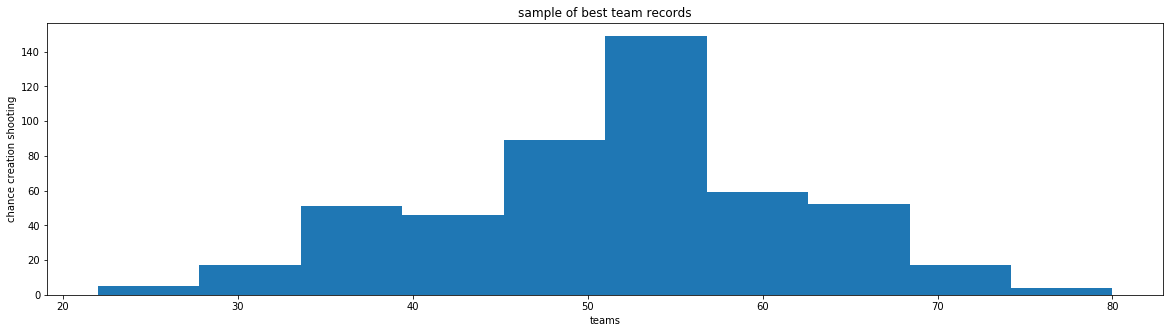

In [7]:
df_team_attributes_visualize = df_team_attributes['chanceCreationShooting'].plot(kind = 'hist', figsize = (20,5))
plt.title("sample of best team records")
plt.xlabel("teams")
plt.ylabel("chance creation shooting")

###  (Q2) Which players had the most penalties?

In [8]:
Best_player = df_player_attributes[df_player_attributes['penalties'] == df_player_attributes['penalties'].max()] # get the max penalties
Best_player = df_player[df_player['player_fifa_api_id'] == Best_player['player_fifa_api_id'].max()]# get the player id
Player_name = Best_player['player_name'] # get his name 
Player_name # Rickie Lambert

8967    Rickie Lambert
Name: player_name, dtype: object

Text(0,0.5,'player id')

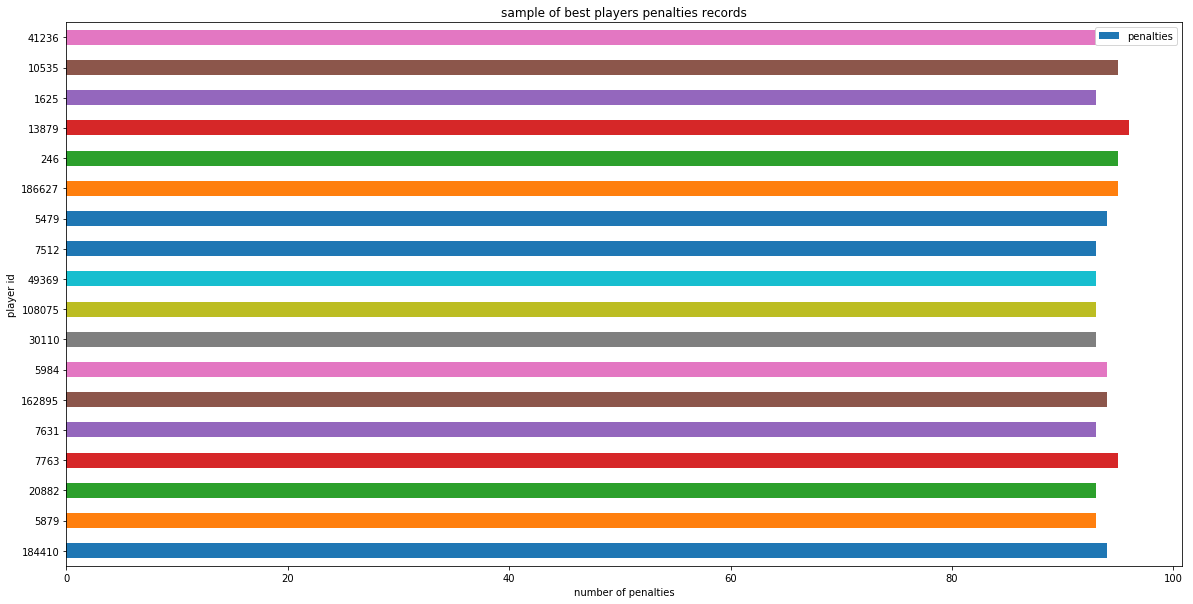

In [9]:
# get a top sample of 1.68*mean of this Data Frame to check it for high speed response
df_mean_player_penalties = df_player_attributes[df_player_attributes['penalties']>df_player_attributes['penalties'].mean()*1.68]
df_mean_player_penalties = df_mean_player_penalties.sort_values('penalties', ascending=False).drop_duplicates('player_fifa_api_id').sort_index() # remove the duplicated ids
df_mean_player_penalties.plot.barh(y='penalties',x='player_fifa_api_id',figsize=(20,10))
plt.title("sample of best players penalties records")
plt.xlabel("number of penalties")
plt.ylabel("player id")

### (Q3) What team attributes lead to the most victories?

In [10]:
vectory_team = df_match[(df_match['home_team_goal'] == df_match['home_team_goal'].max())]# get the max team that has goals
vectory_team = df_team[df_team['team_api_id'] == vectory_team['home_team_api_id'].max()]# get the team id
Team_name = vectory_team['team_long_name']# get the team name
Team_name # FC Bayern Munich

94    FC Bayern Munich
Name: team_long_name, dtype: object

Text(0,0.5,'team')

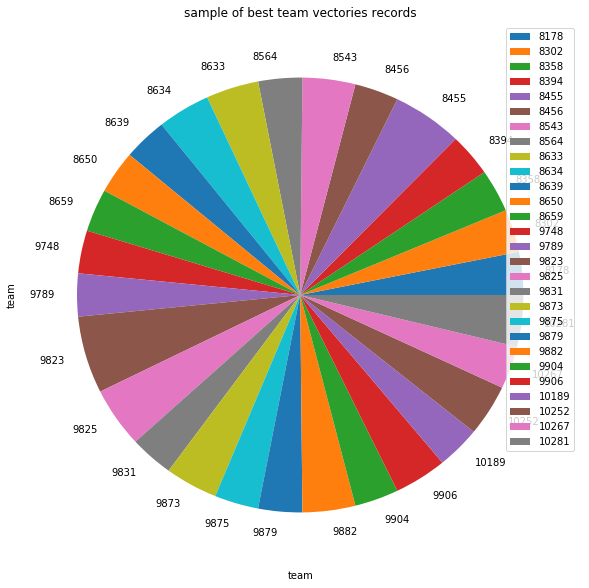

In [11]:
df_mean_team_goals = df_match[df_match['home_team_goal'] > df_match['home_team_goal'].mean()*2.6] #get the high sample of 2.6*mean of DF
df_mean_team_goals = df_mean_team_goals.sort_values('home_team_goal', ascending=False).drop_duplicates('home_team_api_id').sort_index()#delete duplicates
df_mean_team_goals.groupby(['home_team_api_id']).sum().plot(kind='pie', y='home_team_goal',figsize=(10,10))
plt.title("sample of best team vectories records")
plt.xlabel("team")
plt.ylabel("team")

### (Q4) What is the top 50 organized teams?

Text(0.5,0.92,'teams')

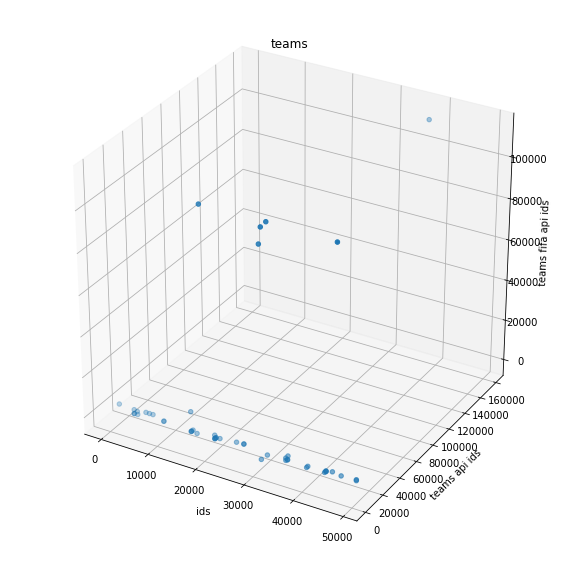

In [26]:
# here we want to have a 3D visualization of top 50 teams
df_team_attributes = df_team_attributes.sort_values('team_fifa_api_id', ascending=False).drop_duplicates('team_fifa_api_id').sort_index()#delete duplicates
top_fifty_teams = df_team_attributes[(df_team_attributes['buildUpPlayPositioningClass'] == 'Organised') & (df_team_attributes['chanceCreationPositioningClass'] == 'Organised') & (df_team_attributes['chanceCreationPassing'] > df_team_attributes['chanceCreationPassing'].mean()) & (df_team_attributes['chanceCreationCrossing'] > df_team_attributes['chanceCreationCrossing'].mean()*1.1)]
top_fifty_ids = top_fifty_teams['team_api_id']
top_fifty_all = df_team[df_team['team_api_id'].isin(top_fifty_ids)] # check and get the targeted teams 
top_fifty_all
z = top_fifty_all['team_fifa_api_id'] # z-axis
y = top_fifty_all['team_api_id'] # y-axis
x = top_fifty_all['id'] # x-axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = "3d") #3D figure
ax.scatter(x, y, z)
ax.set_xlabel("ids")
ax.set_ylabel("teams api ids")
ax.set_zlabel("teams fifa api ids")
ax.set_title("teams")

<a id='conclusions'></a>
## Conclusions

> **Note**: Finally, summarize our findings and the results that have been performed. The teams improved the most over the time was Celtic, Which players had the most penalties was Rickie Lambert and team attributes lead to the most victories was FC Bayern Munich in addition to a a list of top 50 organized teams.


> **Note**: There is some limitations here, as we use here a sample of the top high 1.68 in the second question and 2.6 in the third one to make the process more easier and high performance and the fourth question we use 1.1 for the same reason.

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0